# Handling Comma Separated Value Files

This notebook showcases methods to extract data from CSVs:
+ csv containing delimiter separated values
+ csv containing tabular data

In [1]:
# import required libraries
import csv
import pandas as pd
from pprint import pprint

## Utilities

In [4]:
def print_basic_csv(file_name, delimiter=','):
    """This function extracts and prints csv content from given filename
       Details: https://docs.python.org/2/library/csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma (',')

    Returns:
        None

    """
    csv_rows = list()
    csv_attr_dict = dict()
    csv_reader = None

    # read csv
    csv_reader = csv.reader(open(file_name, 'r'), delimiter=delimiter)
        
    # iterate and extract data    
    for row in csv_reader:
        print(row)
        csv_rows.append(row)
    
    # prepare attribute lists
    for col in csv_rows[0]:
        csv_attr_dict[col]=list()
    
    # iterate and add data to attribute lists
    for row in csv_rows[1:]:
        csv_attr_dict['sno'].append(row[0])
        csv_attr_dict['fruit'].append(row[1])
        csv_attr_dict['color'].append(row[2])
        csv_attr_dict['price'].append(row[3])
    
    # print the result
    print("\n\n")
    print("CSV Attributes::")
    pprint(csv_attr_dict)
            


def print_tabular_data(file_name,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
       Details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(file_name,sep=delimiter)
    print(df)

## Parse using CSV module

The print_basic_csv() function takes the input file name along with delimiter as input parameters.

In [6]:
print_basic_csv(r'tabular_csv.csv')

['sno', 'fruit', 'color', 'price']
['1', 'apple', 'red', '110.85']
['2', 'banana', 'yellow', '50.12']
['3', 'mango', 'yellow', '70.29']
['4', 'orange', 'orange', '80.00']
['5', 'kiwi', 'green', '150.00']
['6', 'pineapple', 'yellow', '90.00']
['7', 'guava', 'green', '20.00']



CSV Attributes::
{'color': ['red', 'yellow', 'yellow', 'orange', 'green', 'yellow', 'green'],
 'fruit': ['apple', 'banana', 'mango', 'orange', 'kiwi', 'pineapple', 'guava'],
 'price': ['110.85', '50.12', '70.29', '80.00', '150.00', '90.00', '20.00'],
 'sno': ['1', '2', '3', '4', '5', '6', '7']}


The first output in the above cell shows the data in the csv as-is.
The second one is the parsed output showcasing the contents of the csv as key-value pairs


--------

## Parse using pandas

The print_tabular_data() function takes the input file name along with delimiter as input parameters. It uses pandas to do the heavy lifting

In [7]:
print_tabular_data(r'tabular_csv.csv')

   sno      fruit   color   price
0    1      apple     red  110.85
1    2     banana  yellow   50.12
2    3      mango  yellow   70.29
3    4     orange  orange   80.00
4    5       kiwi   green  150.00
5    6  pineapple  yellow   90.00
6    7      guava   green   20.00


The output in the above cell shows how pandas reads a csv and prepares a tabular dataframe

## Data Wrangling¶

This notebook presents different data wrangling techniques used commonly


In [8]:
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange
from sklearn import preprocessing

pd.options.mode.chained_assignment = None

## Utilities

In [10]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10))+ product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

## Generate a Sample Dataset


In [12]:
df = generate_sample_data(row_count=1000)
df

,Serial No,Date,User ID,Product ID,Quantity Purchased,Price,User Type
0,1000,2016-01-14,-101,0,41,3365.12,n
1,1001,2016-01-15,5899,917,36,3908.42,n
2,1002,NaN,5600,334,10,626.91,n
3,1003,NaN,5013,494,7,2210.93,n
4,1004,2016-01-23,5098,1098,4,55.96,n
5,1005,2016-01-24,5920,364,27,1680.07,n
6,1006,2016-11-01,5514,204,29,NaN,n
7,1007,NaN,5225,886,40,3538.35,n
8,1008,NaN,5386,849,21,7.67,n
9,1009,2016-07-01,5945,830,9,3208.30,n


### Describe the dataset

In [13]:
describe_dataframe(df)




******************************
About the Data
******************************
Number of rows:: 1000
Number of columns:: 7


Column Names:: ['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


Column Data Types::
 Serial No               int32
Date                   object
User ID                 int64
Product ID              int64
Quantity Purchased      int32
Price                 float64
User Type              object
dtype: object


Columns with Missing Values:: ['Date', 'Price']


Number of rows with Missing Values:: 60


Sample Indices with missing data:: [2, 3, 6, 7, 8]


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Serial No             1000 non-null int32
Date                  969 non-null object
User ID               1000 non-null int64
Product ID            1000 non-null int64
Quantity Purchased    1000 non-null int32
Price                 969 non-null float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead


         Serial No      User ID   Product ID  Quantity Purchased        Price
count  1000.000000  1000.000000  1000.000000         1000.000000   969.000000
mean   1455.035000  5494.219000   586.593000           20.867000  2280.230764
std     379.491963   320.623565   304.847692           12.018226  1625.363985
min      -1.000000  -101.000000     0.000000            1.000000     4.050000
25%    1228.750000  5254.000000   321.000000           11.000000   963.060000
50%    1482.500000  5458.500000   579.500000           20.000000  2025.220000
75%    1740.250000  5708.250000   864.500000           31.000000  3259.570000
max    1999.000000  5975.000000  1099.000000           41.000000  8750.950000


Dataframe Sample Rows::


,Serial No,Date,User ID,Product ID,Quantity Purchased,Price,User Type
0,1000,2016-01-14,-101,0,41,3365.12,n
1,1001,2016-01-15,5899,917,36,3908.42,n
2,1002,NaN,5600,334,10,626.91,n
3,1003,NaN,5013,494,7,2210.93,n
4,1004,2016-01-23,5098,1098,4,55.96,n


### Rename Columns

In [14]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


In [15]:
cleanup_column_names(df)

In [16]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['serial_no', 'date', 'user_id', 'product_id', 'quantity_purchased', 'price', 'user_type']


### Sort Rows on defined attributes

In [17]:
display(df.sort_values(['serial_no', 'price'], 
                         ascending=[True, False]).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
350,-1,2016-11-02,5397,661,4,7748.47,a
302,-1,2016-01-27,5600,334,34,6955.32,b
407,-1,2016-01-26,5225,886,4,5169.43,d
652,-1,2016-01-15,5490,321,12,4210.00,b
874,-1,2016-01-16,5557,235,21,4047.67,d


### Rearrange Columns in a Dataframe

In [18]:
display(df[['serial_no','date','user_id','user_type',
              'product_id','quantity_purchased','price']].head())

,serial_no,date,user_id,user_type,product_id,quantity_purchased,price
0,1000,2016-01-14,-101,n,0,41,3365.12
1,1001,2016-01-15,5899,n,917,36,3908.42
2,1002,NaN,5600,n,334,10,626.91
3,1003,NaN,5013,n,494,7,2210.93
4,1004,2016-01-23,5098,n,1098,4,55.96


# Filtering Columns

using Column index

In [28]:
# print 10 values from column at index 3
print(df.iloc[:,3].values[0:10])

[   0  917  334  494 1098  364  204  886  849  830]


In [20]:
# print 10 values of quantity purchased
print(df.quantity_purchased.values[0:10])

[41 36 10  7  4 27 29 40 21  9]


## Filtering Rows

Select specific rows

In [29]:
display(df.iloc[[10,501,20]])

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
10,1010,2016-01-17,5375,382,24,1257.48,n
501,1501,2016-01-28,5899,917,5,1704.00,d
20,1020,NaN,5513,1099,41,5493.57,n


Exclude Specific Row indices


In [30]:
display(df.drop([0,24,51], axis=0).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1001,2016-01-15,5899,917,36,3908.42,n
2,1002,NaN,5600,334,10,626.91,n
3,1003,NaN,5013,494,7,2210.93,n
4,1004,2016-01-23,5098,1098,4,55.96,n
5,1005,2016-01-24,5920,364,27,1680.07,n


Conditional Filtering

In [31]:
display(df[df.quantity_purchased>25].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
0,1000,2016-01-14,-101,0,41,3365.12,n
1,1001,2016-01-15,5899,917,36,3908.42,n
5,1005,2016-01-24,5920,364,27,1680.07,n
6,1006,2016-11-01,5514,204,29,NaN,n
7,1007,NaN,5225,886,40,3538.35,n


Offset from top of the dataframe

In [32]:
display(df[100:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
100,1100,2016-04-02,5330,267,9,5680.65,d
101,1101,2016-04-01,5899,917,22,2605.77,a
102,1102,2016-02-01,5600,334,33,2435.44,c
103,1103,2016-01-30,5013,494,41,1662.48,c
104,1104,2016-01-29,5098,1098,20,3064.82,d


Offset from bottom of the dataframe

In [33]:
display(df[-10:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
990,1990,2016-01-01,5975,573,40,NaN,c
991,1991,2016-01-01,5675,705,36,4386.59,c
992,1992,2016-02-02,5048,928,31,5736.67,b
993,1993,2016-01-19,5890,264,19,6100.55,c
994,1994,2016-01-20,5491,866,7,3307.28,b


# Typecasting /Data Type COnversion

In [34]:
df['date'] = pd.to_datetime(df.date)
# compare dtypes of the original df with this one
print(df.dtypes)

serial_no                      int32
date                  datetime64[ns]
user_id                        int64
product_id                     int64
quantity_purchased             int32
price                        float64
user_type                     object
dtype: object


## Apply/Map Usage

Map : Create a derived attribute using map


In [36]:
df['user_class'] = df['user_type'].map(expand_user_type)
display(df.tail())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class
995,1995,2016-04-01,5300,135,26,193.49,a,new
996,1996,2016-01-21,5237,788,36,2920.38,b,new
997,-1,2016-01-31,5802,729,6,2316.65,d,loyal_existing
998,1998,2016-01-27,5703,478,10,1627.25,d,loyal_existing
999,1999,2016-07-02,5680,810,14,4246.21,b,new


Apply: Using apply to get attribute ranges


In [38]:
display(df.select_dtypes(include=[np.number]).apply(lambda x: 
                                                        x.max()- x.min()))

serial_no             2000.0
user_id               6076.0
product_id            1099.0
quantity_purchased      40.0
price                 8746.9
dtype: float64

Applymap: Extract week from date

In [40]:
df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                                if not pd.isnull(dt.week) 
                                                else 0)

In [41]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,2016-01-14,-101,0,41,3365.12,n,error,2
1,1001,2016-01-15,5899,917,36,3908.42,n,error,2
2,1002,NaT,5600,334,10,626.91,n,error,0
3,1003,NaT,5013,494,7,2210.93,n,error,0
4,1004,2016-01-23,5098,1098,4,55.96,n,error,3


## Missing values

Drop Rows with missing dates


In [42]:
df_dropped = df.dropna(subset=['date'])
display(df_dropped.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,2016-01-14,-101,0,41,3365.12,n,error,2
1,1001,2016-01-15,5899,917,36,3908.42,n,error,2
4,1004,2016-01-23,5098,1098,4,55.96,n,error,3
5,1005,2016-01-24,5920,364,27,1680.07,n,error,3
6,1006,2016-11-01,5514,204,29,NaN,n,error,44


Fill Missing Price values with mean price


In [43]:
df_dropped['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                                inplace=True)

Fill Missing user_type values with value from previous row (forward fill) 

In [44]:
df_dropped['user_type'].fillna(method='ffill',inplace=True)

In [45]:
#Fill Missing user_type values with value from next row (backward fill)
df_dropped['user_type'].fillna(method='bfill',inplace=True)

## Duplicates

Drop Duplicate serial_no rows


In [46]:
# sample duplicates
display(df_dropped[df_dropped.duplicated(subset=['serial_no'])].head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
109,-1,2016-11-02,5945,830,15,2313.41,b,new,44
128,-1,2016-10-01,5134,287,12,1461.85,c,existing,39
147,-1,2016-01-25,5456,407,18,993.57,a,new,4
154,-1,2016-06-01,5927,1036,39,1717.04,b,new,22
174,-1,2016-01-02,5557,235,16,691.57,b,new,53


Shape of df=(969, 9)


In [47]:
df_dropped.drop_duplicates(subset=['serial_no'],inplace=True)

In [48]:
# updated dataframe
display(df_dropped.head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,2016-01-14,-101,0,41,3365.12,n,error,2
1,1001,2016-01-15,5899,917,36,3908.42,n,error,2
4,1004,2016-01-23,5098,1098,4,55.96,n,error,3
5,1005,2016-01-24,5920,364,27,1680.07,n,error,3
6,1006,2016-11-01,5514,204,29,2280.23,n,error,44


Shape of df=(942, 9)


In [49]:
#Remove rows which have less than 3 attributes with non-missing data
display(df.dropna(thresh=3).head())
print("Shape of df={}".format(df.dropna(thresh=3).shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,2016-01-14,-101,0,41,3365.12,n,error,2
1,1001,2016-01-15,5899,917,36,3908.42,n,error,2
2,1002,NaT,5600,334,10,626.91,n,error,0
3,1003,NaT,5013,494,7,2210.93,n,error,0
4,1004,2016-01-23,5098,1098,4,55.96,n,error,3


Shape of df=(1000, 9)


## Encode Categoricals

One Hot Encoding using get_dummies()

In [50]:
display(pd.get_dummies(df,columns=['user_type']).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_class,purchase_week,user_type_a,user_type_b,user_type_c,user_type_d,user_type_n
0,1000,2016-01-14,-101,0,41,3365.12,error,2,0,0,0,0,1
1,1001,2016-01-15,5899,917,36,3908.42,error,2,0,0,0,0,1
2,1002,NaT,5600,334,10,626.91,error,0,0,0,0,0,1
3,1003,NaT,5013,494,7,2210.93,error,0,0,0,0,0,1
4,1004,2016-01-23,5098,1098,4,55.96,error,3,0,0,0,0,1


Label Mapping

In [51]:
type_map={'a':0,'b':1,'c':2,'d':3,np.NAN:-1}
df['encoded_user_type'] = df.user_type.map(type_map)
display((df.tail()))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
995,1995,2016-04-01,5300,135,26,193.49,a,new,13,0.0
996,1996,2016-01-21,5237,788,36,2920.38,b,new,3,1.0
997,-1,2016-01-31,5802,729,6,2316.65,d,loyal_existing,4,3.0
998,1998,2016-01-27,5703,478,10,1627.25,d,loyal_existing,4,3.0
999,1999,2016-07-02,5680,810,14,4246.21,b,new,26,1.0


## Random Sampling data from DataFrame

In [52]:
display(df.sample(frac=0.2, replace=True, random_state=42).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
102,1102,2016-02-01,5600,334,33,2435.44,c,existing,5,2.0
435,1435,2016-10-02,5253,658,23,96.49,c,existing,39,2.0
860,1860,2016-01-25,5349,405,4,1078.90,c,existing,4,2.0
270,1270,2016-05-01,5447,383,4,2675.59,b,new,17,1.0
106,1106,2016-01-29,5514,204,19,242.47,b,new,4,1.0


### Normalizing Numeric Values

Normalize price values using Min-Max Scaler


In [53]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['price'].values.reshape(-1,1))
df_normalized['price'] = np_scaled.reshape(-1,1)

In [54]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
24,1024,2016-01-25,5963,640,24,0.130222,a,new,4,0.0
30,1030,2016-01-26,5397,265,13,0.264418,a,new,4,0.0
33,1033,2016-01-31,5729,864,33,0.645466,a,new,4,0.0
36,1036,2016-10-01,5805,426,36,0.082301,d,loyal_existing,39,3.0
39,1039,2016-05-01,5631,299,5,0.042980,a,new,17,0.0


Normalize quantity purchased values using Robust Scaler


In [55]:
df_normalized = df.dropna().copy()
robust_scaler = preprocessing.RobustScaler()
rs_scaled = robust_scaler.fit_transform(df_normalized['quantity_purchased'].values.reshape(-1,1))
df_normalized['quantity_purchased'] = rs_scaled.reshape(-1,1)

In [56]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
24,1024,2016-01-25,5963,640,0.20,1088.85,a,new,4,0.0
30,1030,2016-01-26,5397,265,-0.35,2206.76,a,new,4,0.0
33,1033,2016-01-31,5729,864,0.65,5381.05,a,new,4,0.0
36,1036,2016-10-01,5805,426,0.80,689.65,d,loyal_existing,39,3.0
39,1039,2016-05-01,5631,299,-0.75,362.09,a,new,17,0.0


### Handling JSON Files

This notebook showcases methods to read JSON type data:

 + using python's inbuilt utilities
 + using pandas


In [7]:
# import required libraries
import json
import pandas as pd

## utilities

In [9]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))

def extract_json(file_name,do_print=True):
    """This function extracts and prints json content from a given file
    Args:
        file_name (str): file path to be read
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        json_filedata = open(file_name).read() 
        json_data = json.loads(json_filedata)
        
        if do_print:
            print_nested_dicts(json_data)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

def extract_pandas_json(file_name,orientation="records",do_print=True):
    """This function extracts and prints json content from a file using pandas
       This is useful when json data represents tabular, series information
    Args:
        file_name (str): file path to be read
        orientation (str): orientation of json file. Defaults to records
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        df = pd.read_json(file_name,orient=orientation)
        
        if do_print:
            print(df)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

## Parse using json module

The extract_json() function takes the input file name as input parameter.

In [10]:
extract_json(r'sample_json.json')

outer_col_1 : 
	nested_inner_col_1 : val_1
	nested_inner_col_2 : 2
	nested_inner_col_1 : val_2
	nested_inner_col_2 : 2
outer_col_2 : 
	inner_col_1 : 3
outer_col_3 : 4


The function generates a nested output resembling the structure of the JSON itself where outer_col_1's value is a nested object in itself

## Parse using pandas
The extract_pandas_json() function takes the input file name as input parameter. It uses pandas to do the heavy lifting

In [12]:
extract_pandas_json(r'pandas_json.json')

  col_1 col_2
0     a     b
1     c     d
2     e     f
3     g     h
4     i     j
5     k     l


The output in the above cell shows how pandas reads a JSON and prepares a tabular dataframe


# Handling XML Files
This notebook showcases methods to read XML type data using:

+ xml library
+ xmltodict library


In [14]:
# import required libraries
import xml.etree.ElementTree as ET
import xmltodict

ModuleNotFoundError: No module named 'xmltodict'

## Utilities

In [15]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))
          
def print_xml_tree(xml_root,indent_level=0):
    """This function prints a nested dict object
    Args:
        xml_root (dict): the xml tree to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    for child in xml_root:
            print("{0}tag:{1}, attribute:{2}".format(
                                                "\t"*indent_level,
                                                child.tag,
                                                child.attrib))
                                                
            print("{0}tag data:{1}".format("\t"*indent_level,
                                            child.text))
                                            
            print_xml_tree(child,indent_level=indent_level+1)
            


def read_xml(file_name):
    """This function extracts and prints XML content from a given file
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        tree = ET.parse(file_name)
        root = tree.getroot()
        
        print("Root tag:{0}".format(root.tag))
        print("Attributes of Root:: {0}".format(root.attrib))
        
        print_xml_tree(root)
            
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except Exception:
        raise

    

def read_xml2dict_xml(file_name):
    """This function extracts and prints xml content from a file using xml2dict
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        xml_filedata = open(file_name).read() 
        ordered_dict = xmltodict.parse(xml_filedata)
        
        print_nested_dicts(ordered_dict)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("XML file has errors")
    except Exception:
        raise 

## Parse using XML module
The read_xml() function takes the input file name as input parameter.

In [16]:
read_xml(r'sample_xml.xml')

Root tag:records
Attributes of Root:: {'attr': 'sample xml records'}
tag:record, attribute:{'name': 'rec_1'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	tag:sub_element_with_attr, attribute:{'attr': 'complex'}
	tag data:
	    Sub_Element_Text
	  
	tag:sub_element_only_attr, attribute:{'attr_val': 'only_attr'}
	tag data:None
tag:record, attribute:{'name': 'rec_2'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	tag:sub_element_with_attr, attribute:{'attr': 'complex'}
	tag data:
	    Sub_Element_Text
	  
	tag:sub_element_only_attr, attribute:{'attr_val': 'only_attr'}
	tag data:None
tag:record, attribute:{'name': 'rec_3'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	

The function generates a nested output resembling the structure of the XML itself. This function provides flexibility in terms of identifying the structure and parsing XML nodes as required.


## Parse using xmltodict

The read_xml2dict_xml() function takes the input file name as input parameter. It uses xmltodict to do the heavy lifting


read_xml2dict_xml(r'sample_xml.xml')

The output in the above cell shows how xmltodict reads an XML file. The function utilizes the xmltodict library to perform the node traversal and extract relevant information. 

## Data Summarization

Condition based aggregation


In [57]:
print("Mean price of items purchased by user_type=a :: {}".format(df['price'][df['user_type']=='a'].mean()))

Mean price of items purchased by user_type=a :: 2280.2370588235285


Condtion based counts


In [58]:
print(df['purchase_week'].value_counts())

4     197
3     153
2     108
5      59
39     54
13     53
53     52
44     49
26     45
35     39
31     38
0      31
9      30
22     29
17     28
48     20
18     15
Name: purchase_week, dtype: int64


## group By

Group By certain attributes

In [59]:
print(df.groupby(['user_class'])['quantity_purchased'].sum())

user_class
error               623
existing           5206
loyal_existing     4974
new               10064
Name: quantity_purchased, dtype: int32


Group By with different aggregate functions


In [60]:
display(df.groupby(['user_class'])['quantity_purchased'].agg([np.sum,
                                                                np.mean,
                                                                np.count_nonzero]))

,sum,mean,count_nonzero
user_class,,,
error,623,20.096774,31
existing,5206,21.423868,243
loyal_existing,4974,21.626087,230
new,10064,20.290323,496


Group by specific aggregate functions for each attribute

In [63]:
display(df.groupby(['user_class','user_type']).agg({'price':np.mean,
                                                        'quantity_purchased':np.max}))

price  quantity_purchased
user_class     user_type                                 
error          n          2413.722000                  41
existing       c          2347.025915                  41
loyal_existing d          2258.229330                  41
new            a          2280.237059                  41
               b          2219.177975                  41

Group by with multiple agg for each attribute


In [64]:
display(df.groupby(['user_class','user_type']).agg({'price':{
                                                                'total_price':np.sum,
                                                                'mean_price':np.mean,
                                                                'variance_price':np.std,
                                                                'count':np.count_nonzero},
                                                   'quantity_purchased':np.sum}))  

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                                     \
                         total_price   mean_price variance_price  count   
user_class     user_type                                                  
error          n            72411.66  2413.722000    1701.217692   31.0   
existing       c           551551.09  2347.025915    1674.627508  243.0   
loyal_existing d           505843.37  2258.229330    1652.838556  230.0   
new            a           542696.42  2280.237059    1643.042764  243.0   
               b           537041.07  2219.177975    1531.835585  253.0   

                         quantity_purchased  
                                        sum  
user_class     user_type                     
error          n                        623  
existing       c                       5206  
loyal_existing d                       4974  
new            a                       4755  
               b                       5309

## Pivot Table

In [65]:
display(df.pivot_table(index='date', columns='user_type', 
                         values='price',aggfunc=np.mean))

user_type,a,b,c,d,n
date,,,,,
2016-01-01,2824.663333,1688.732000,3600.575000,1899.186667,NaN
2016-01-02,1573.878000,2564.238000,2420.202857,2097.215000,NaN
2016-01-13,1612.012500,3420.524000,1643.188000,1553.170000,NaN
2016-01-14,3968.900000,1226.831667,1592.224000,1854.826667,3302.575
2016-01-15,3001.972000,3105.406250,2644.504000,1268.446250,3908.420
2016-01-16,2325.893333,2802.045000,2396.230000,4047.670000,NaN
2016-01-17,2536.400000,2242.718889,1843.233333,1240.380000,1257.480
2016-01-18,1881.355000,1941.725000,2053.780000,1938.190000,NaN
2016-01-19,2109.003333,3155.130000,2843.074000,1621.945000,NaN


## Stack a Dataframe

In [66]:
print(df.stack())

0    serial_no                            1000
     date                  2016-01-14 00:00:00
     user_id                              -101
     product_id                              0
     quantity_purchased                     41
     price                             3365.12
     user_type                               n
     user_class                          error
     purchase_week                           2
1    serial_no                            1001
     date                  2016-01-15 00:00:00
     user_id                              5899
     product_id                            917
     quantity_purchased                     36
     price                             3908.42
     user_type                               n
     user_class                          error
     purchase_week                           2
2    serial_no                            1002
     user_id                              5600
     product_id                            334
     quantity

# Data visualization

This script showcases following data viz using :

 + pandas
     + plots and sub plots
     + hist
     + box
     + scatter
     + timeseries
 + matplotlib


In [68]:
%matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

## Utilities

In [69]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10)) + product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

## Prepare the dataset

In [70]:
df = generate_sample_data(row_count=1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)


df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                            if not pd.isnull(dt.week) 
                                            else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                            inplace=True)

In [71]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
2,1002,2016-01-29,5653,186,34,436.26,n,error,4
3,1003,2016-11-02,5715,310,6,1197.66,n,error,44
4,1004,2016-01-20,5390,283,10,1172.64,n,error,3
5,1005,2016-01-24,5637,994,41,2037.30,n,error,3
7,1007,2016-01-26,5850,207,15,3649.74,n,error,4


# Visualizations

## Line chart

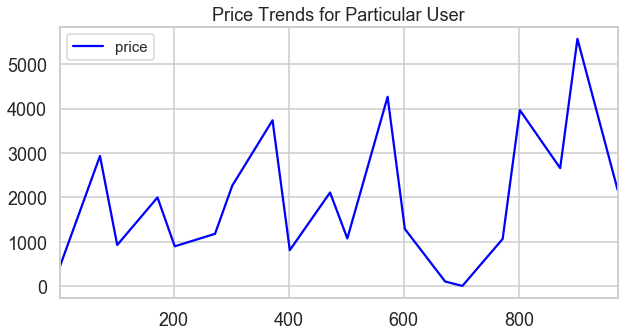

In [72]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style='blue')
plt.title('Price Trends for Particular User')
plt.show()

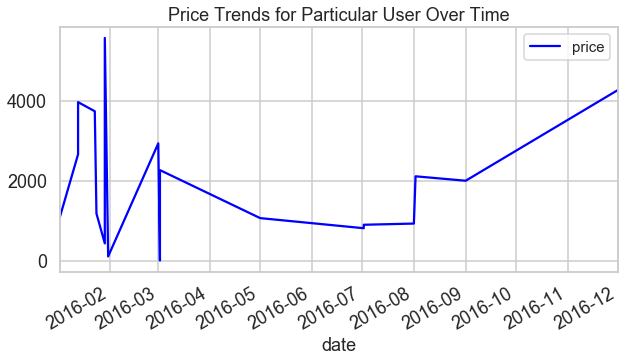

In [73]:
df[df.user_id == max_user_id].plot(x='date',y='price',style='blue')   
plt.title('Price Trends for Particular User Over Time')
plt.show()

## Bar Plot

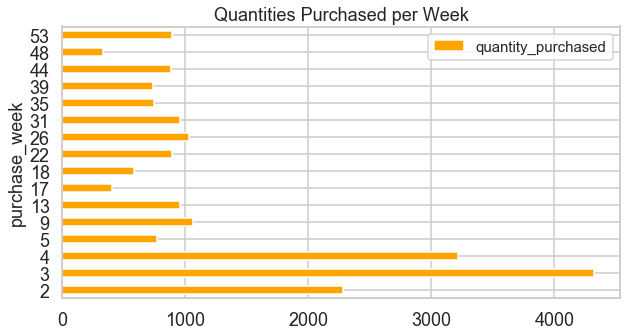

In [74]:
df[['purchase_week',
    'quantity_purchased']].groupby('purchase_week').sum().plot.barh(
                                                            color='orange')
plt.title('Quantities Purchased per Week')
plt.show()

## Histogram

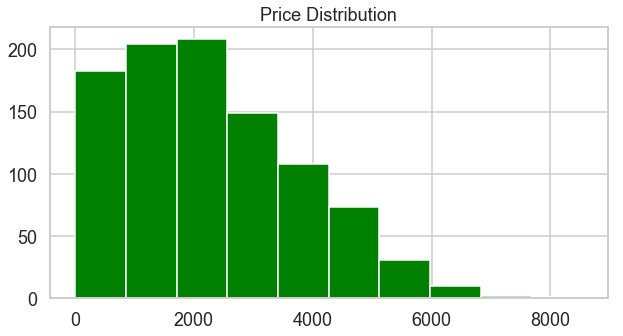

In [75]:
df.price.hist(color='green')
plt.title('Price Distribution')
plt.show()

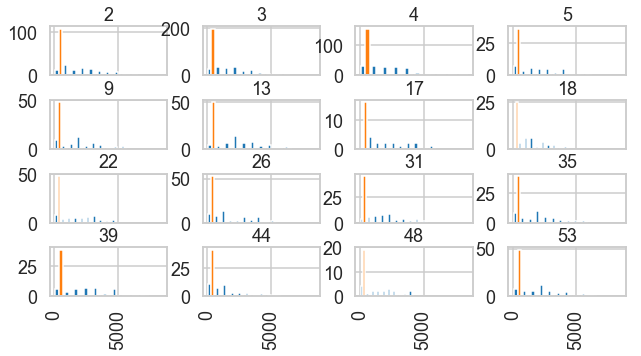

In [76]:
df[['price','purchase_week']].hist(by='purchase_week',sharex=True)
#plt.title('Price Distribution per Week')
plt.show()

## Pie Chart

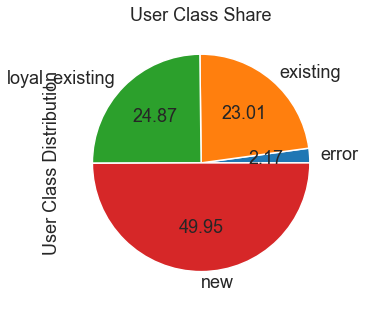

In [77]:
class_series = df.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()

## Box Plot

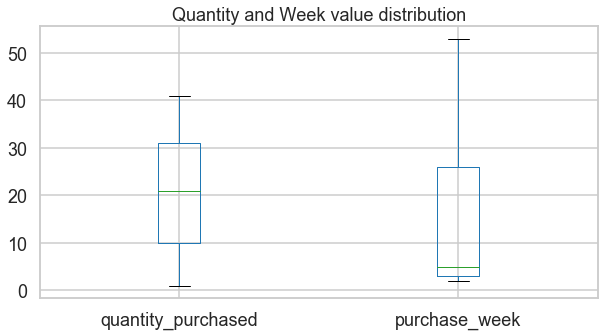

In [78]:
df[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()

## Bubble Chart

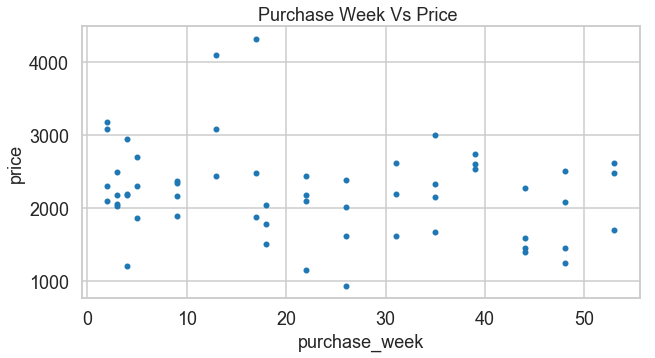

In [79]:
# bubble
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3,'error':0}
df['enc_uclass'] = df.user_class.map(uclass_map) 
bubble_df = df[['enc_uclass',
                'purchase_week',
                'price','product_id']].groupby(['purchase_week',
                                                'enc_uclass']).agg({'price':'mean',
                                                                    'product_id':'count'}).reset_index()
bubble_df.rename(columns={'product_id':'total_transactions'},inplace=True)


bubble_df.plot.scatter(x='purchase_week',
                       y='price')
plt.title('Purchase Week Vs Price ')
plt.show() 

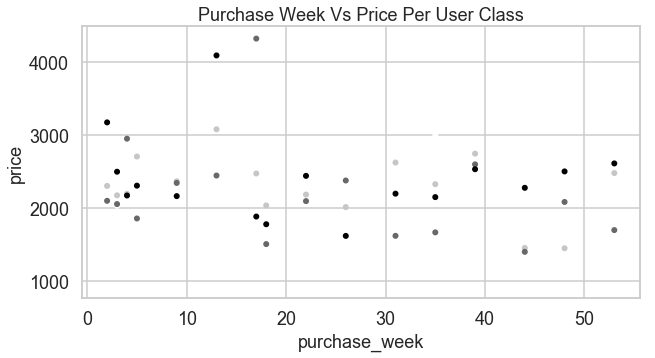

In [80]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass']) 
plt.title('Purchase Week Vs Price Per User Class')                       
plt.show() 

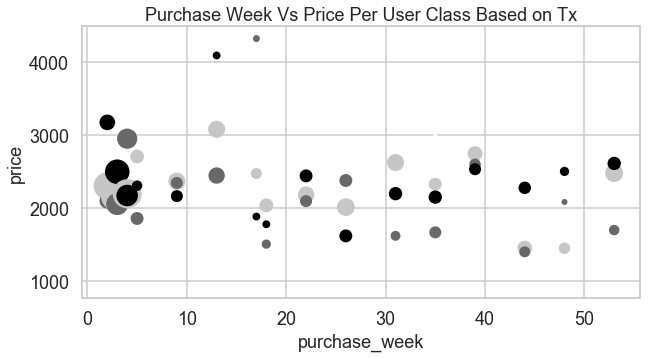

In [81]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()

## Visualizations using 𝑚𝑎𝑡𝑝𝑙𝑜𝑡𝑙𝑖𝑏

This notebook showcases visualizations using matplotlib

In [82]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

## Sample Plot

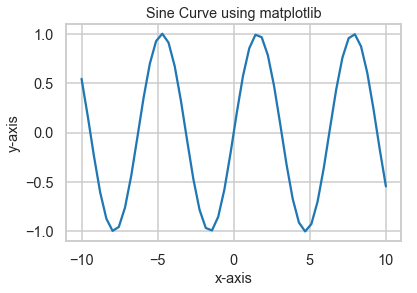

In [83]:
# sample plot
x = np.linspace(-10, 10, 50)
y=np.sin(x)

plt.plot(x,y)
plt.title('Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## The Figure object

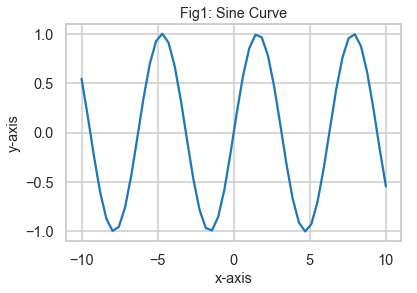

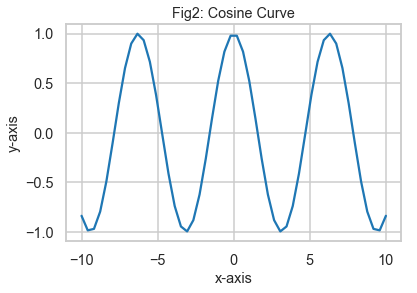

In [85]:
# figure
plt.figure(1)
plt.plot(x,y)
plt.title('Fig1: Sine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

plt.figure(2)
y=np.cos(x)
plt.plot(x,y)
plt.title('Fig2: Cosine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Subplots

### using add_subplot()

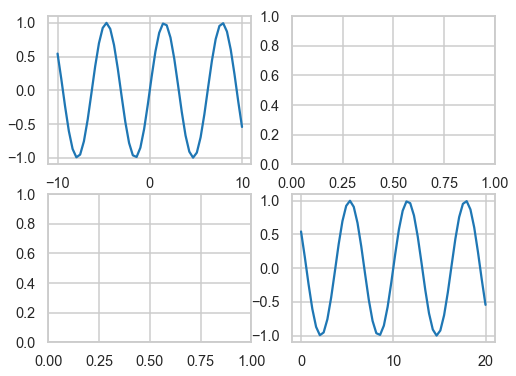

In [86]:
# fig.add_subplot
y = np.sin(x)
figure_obj = plt.figure(figsize=(8, 6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)

ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)
plt.show()

### Using subplots()

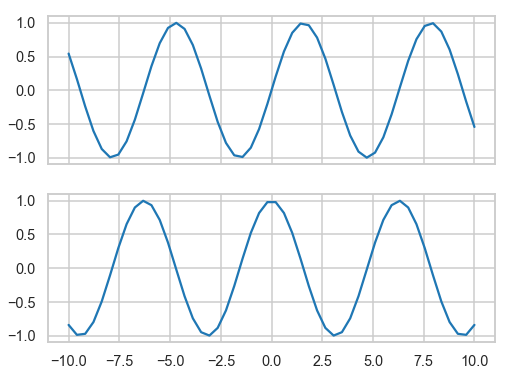

In [87]:
# plt.subplots
fig, ax_list = plt.subplots(2,1,sharex=True, figsize=(8, 6))
y= np.sin(x)
ax_list[0].plot(x,y)

y= np.cos(x)
ax_list[1].plot(x,y)
plt.show()

### Using subplot()

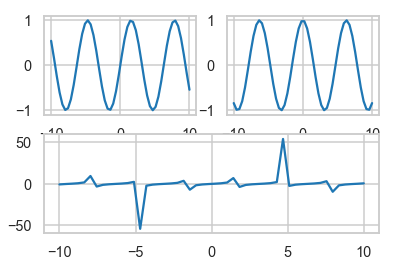

In [88]:
# plt.subplot (creates figure and axes objects automatically)
plt.subplot(2,2,1)
y = np.sin(x)    
plt.plot(x,y)

plt.subplot(2,2,2)
y = np.cos(x)
plt.plot(x,y)

plt.subplot(2,1,2)
y = np.tan(x)
plt.plot(x,y)  

plt.show()

### Using subplot2grid()

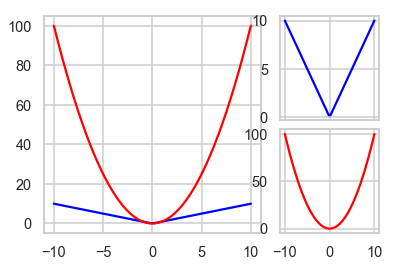

In [89]:
# subplot2grid
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y,'b',x,z,'r')

ax2 = plt.subplot2grid((4,3), (0, 2),rowspan=2)
plt.plot(x, y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

plt.show()

## Foramting

In [91]:
y = x

+ Line Color
+ Line Style
+ Data Marker
+ Line Width
+ Alpha Level/Transparency
+ Shorthand notation

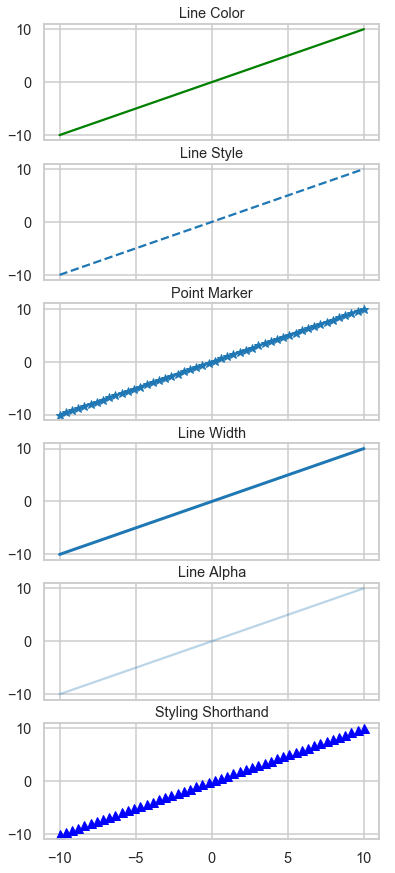

In [93]:
# color
ax1 = plt.subplot(611)
plt.plot(x,y,color='green')
ax1.set_title('Line Color')
plt.setp(ax1.get_xticklabels(), visible=False)

# linestyle
# linestyles -> '-','--','-.', ':', 'steps'
ax2 = plt.subplot(612,sharex=ax1)
plt.plot(x,y,linestyle='--')
ax2.set_title('Line Style')
plt.setp(ax2.get_xticklabels(), visible=False)

# marker
# markers -> '+', 'o', '*', 's', ',', '.', etc
ax3 = plt.subplot(613,sharex=ax1)
plt.plot(x,y,marker='*')
ax3.set_title('Point Marker')
plt.setp(ax3.get_xticklabels(), visible=False)

# line width
ax4 = plt.subplot(614,sharex=ax1)
line = plt.plot(x,y)
line[0].set_linewidth(3.0)
ax4.set_title('Line Width')
plt.setp(ax4.get_xticklabels(), visible=False)

# alpha
ax5 = plt.subplot(615,sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(0.3)
ax5.set_title('Line Alpha')
plt.setp(ax5.get_xticklabels(), visible=False)

# combine linestyle
ax6 = plt.subplot(616,sharex=ax1)
plt.plot(x,y,'b^')
ax6.set_title('Styling Shorthand')

fig = plt.gcf()
fig.set_figheight(15)
plt.show()

## Legends

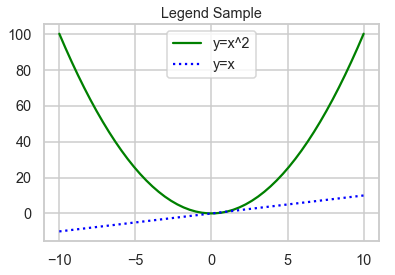

In [94]:
# legends
y = x**2
z = x

plt.plot(x,y,'g',label='y=x^2')
plt.plot(x,z,'b:',label='y=x')
plt.legend(loc="best")
plt.title('Legend Sample')
plt.show()

## Legend with 𝐿𝑎𝑡𝑒𝑥 formatting

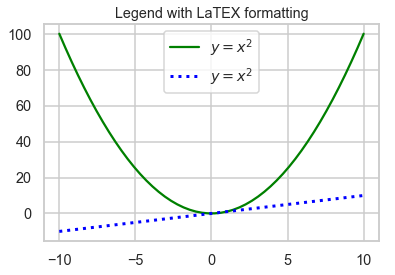

In [95]:
# legend with latex formatting
plt.plot(x,y,'g',label='$y = x^2$')
plt.plot(x,z,'b:',linewidth=3,label='$y = x^2$')
plt.legend(loc="best",fontsize='x-large')
plt.title('Legend with LaTEX formatting')
plt.show()

## Axis Controls

### Secondary y-axis

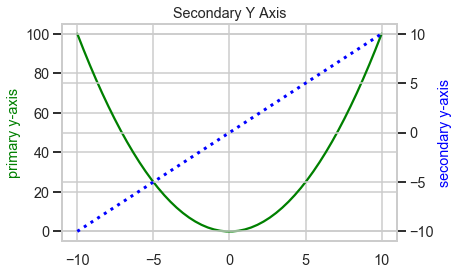

In [96]:
## axis controls
# secondary y-axis
fig, ax1 = plt.subplots()
ax1.plot(x,y,'g')
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()

ax2.plot(x,z,'b:',linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title('Secondary Y Axis')
plt.show()

## Axis ticks

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


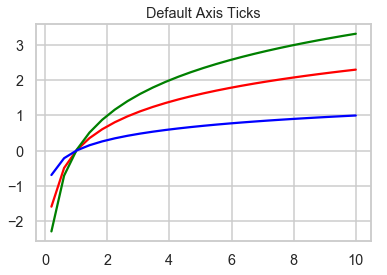

In [97]:
# ticks
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.title('Default Axis Ticks') 
plt.show() 

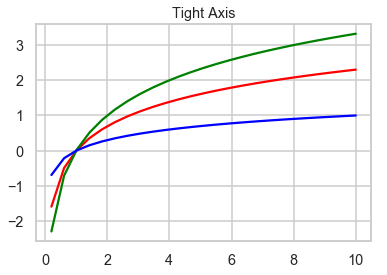

In [98]:
plt.plot(x,y,'r',x,z,'g',x,w,'b')
# values: tight, scaled, equal,auto
plt.axis('tight')
plt.title('Tight Axis') 
plt.show()

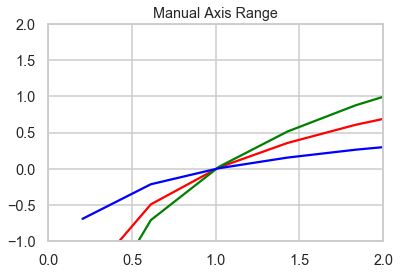

In [99]:
# manual
plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.axis([0,2,-1,2])
plt.title('Manual Axis Range') 
plt.show()

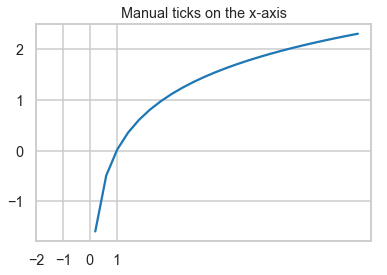

In [100]:
# Manual ticks      
plt.plot(x, y)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")
plt.show()

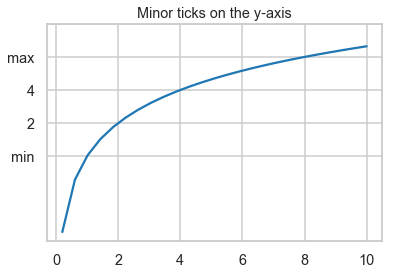

In [101]:
# minor ticks
plt.plot(x, z)
plt.minorticks_on()
ax = plt.gca()
ax.yaxis.set_ticks(np.arange(0, 5))
ax.yaxis.set_ticklabels(["min", 2, 4, "max"])
plt.title("Minor ticks on the y-axis")   
plt.show()

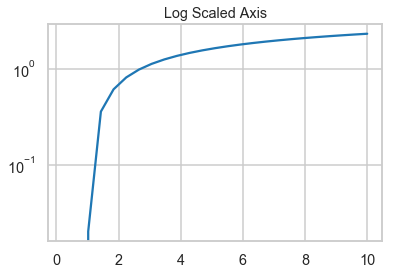

In [102]:
# scaling
plt.plot(x, y)
ax = plt.gca()
# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")
plt.show()

## Annotations

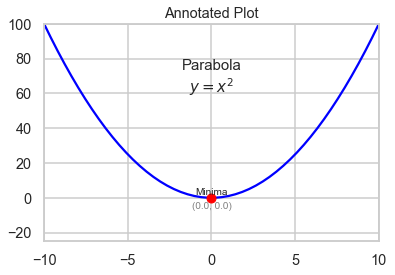

In [103]:
# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10,10,-25,100])

plt.text(0, 60, "Parabola\n$y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha='center',color='gray')
plt.title("Annotated Plot")
plt.show()

## Crawling Web Pages

This notebook crawls apress.com's blog post to:

+ extract content related to blog post using regex


In [1]:
# import required libraries
import re
import requests

## Utility

In [2]:
def extract_blog_content(content):
    """This function extracts blog post content using regex

    Args:
        content (request.content): String content returned from requests.get

    Returns:
        str: string content as per regex match

    """
    content_pattern = re.compile(r'<div class="cms-richtext">(.*?)</div>')
    result = re.findall(content_pattern, content)
    return result[0] if result else "None"

## Crawl the Web

Set the URL and blog post to be parsed

In [3]:
base_url = "http://www.apress.com/in/blog/all-blog-posts"
blog_suffix = "/wannacry-how-to-prepare/12302194"

Use requests library to make a get request


In [4]:
response = requests.get(base_url+blog_suffix)

Identify and Parse blog content using python's regex library (re)

In [5]:
if response.status_code == 200:
        content = response.text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')
        content = content.replace("\n", '')
        blog_post_content = extract_blog_content(content)

View first 500 characters of the blogpost

In [6]:
blog_post_content[0:500]

'<p class="intro--paragraph"><em>By Mike Halsey</em></p><p><br /></p><p>It was a perfectly ordinary Friday when the Wannacry ransomware struck in May 2017. The malware spread around the world to more than 150 countries in just a matter of a few hours, affecting the National Health Service in the UK, telecoms provider Telefonica in Spain, and many other organisations and businesses in the USA, Canada, China, Japan, Russia, and right across Europe, the Middle-East, and Asia.</p><p>The malware was r'